In [10]:
import pandas
import matplotlib.pyplot as plt
import numpy as np
df = pandas.read_csv('../data/predictive_maintenance.csv')


Verificando nulos e info

In [11]:
df.isnull().sum() #Não há nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


Análise Univariada

Air temperature [K]: 0 outliers


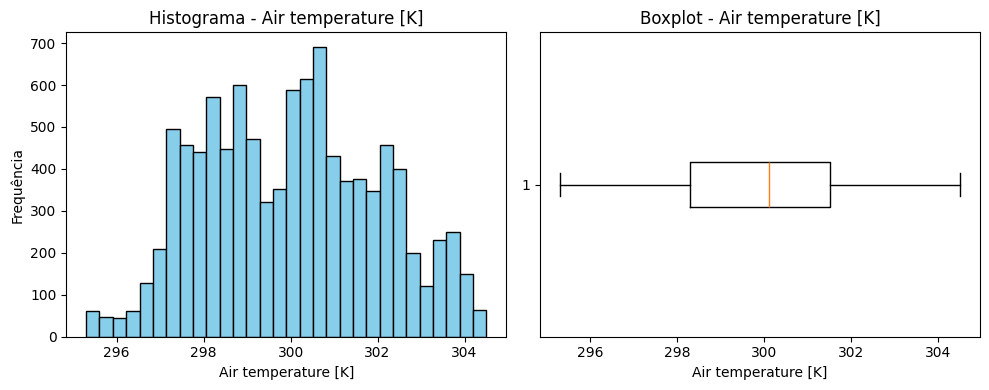

Process temperature [K]: 0 outliers


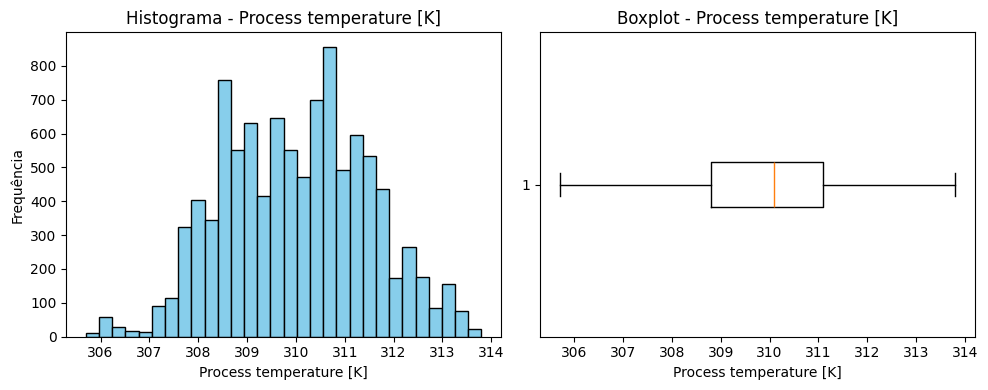

Rotational speed [rpm]: 418 outliers


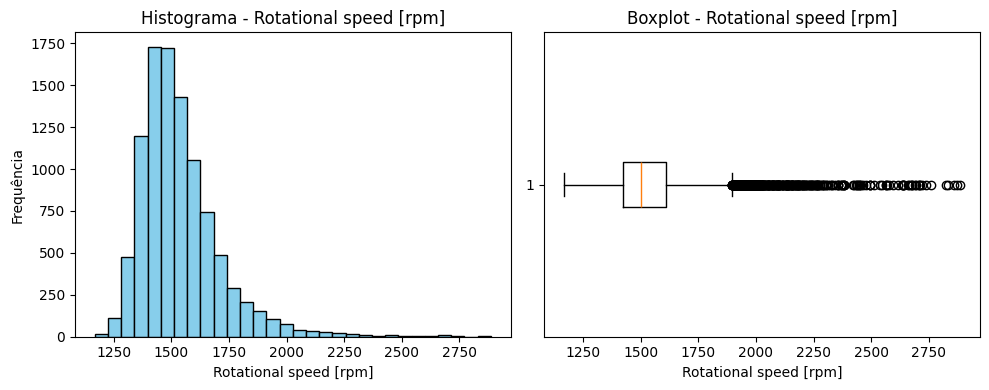

Torque [Nm]: 69 outliers


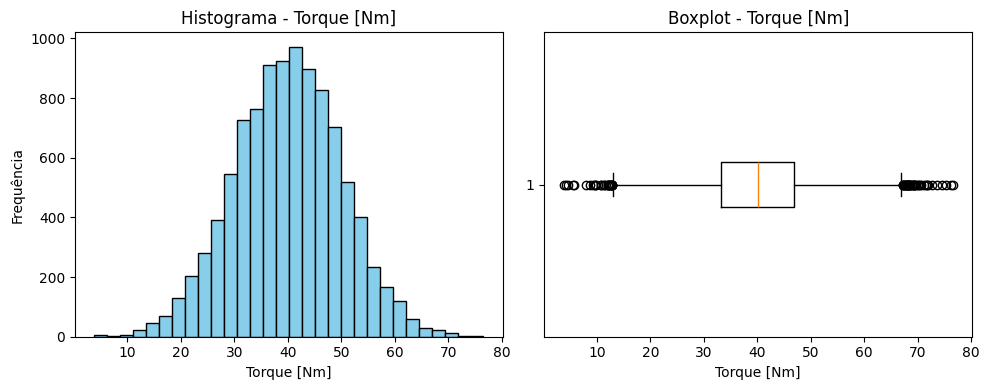

Tool wear [min]: 0 outliers


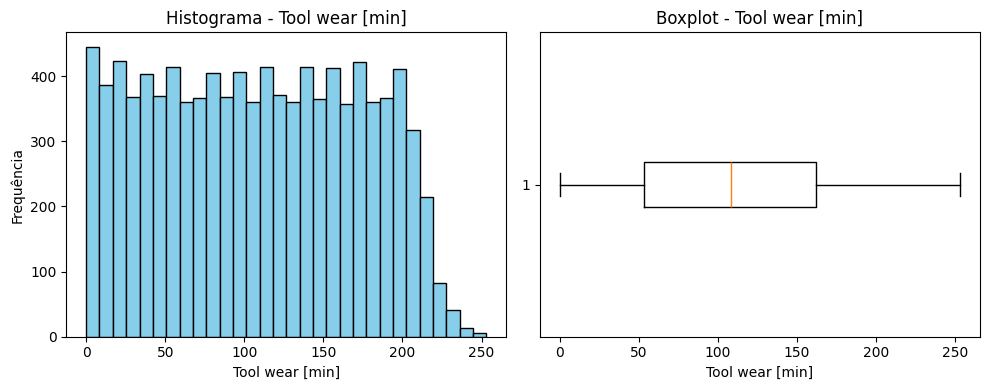

In [19]:
numericas = [x for x in df.columns.to_list() if x not in ['UDI', 'Product ID', 'Type', 'Target', 'Failure Type']]
numericas

for col in numericas:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    outliers = df[(df[col] < (q1 - 1.5 * iqr)) | (df[col] > (q3 + 1.5 * iqr))]
    print(f"{col}: {len(outliers)} outliers")


    plt.figure(figsize=(10, 4))

    # Histograma
    plt.subplot(1, 2, 1)
    plt.hist(df[col], bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Histograma - {col}')
    plt.xlabel(col)
    plt.ylabel('Frequência')

    # Boxplot
    plt.subplot(1, 2, 2)
    plt.boxplot(df[col], vert=False)
    plt.title(f'Boxplot - {col}')
    plt.xlabel(col)

    plt.tight_layout()
    plt.show()



Variáveis categóricas

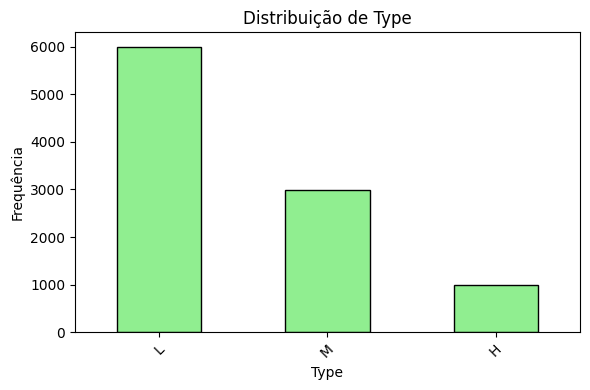

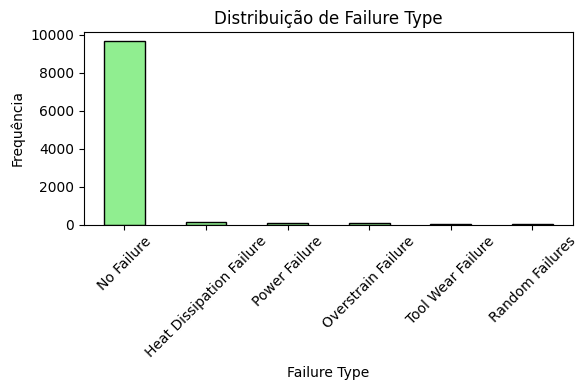

In [13]:
cat = ['Type', 'Failure Type']

for col in cat:
    plt.figure(figsize=(6, 4))
    df[col].value_counts().plot(kind='bar', color='lightgreen', edgecolor='black')
    plt.title(f'Distribuição de {col}')
    plt.ylabel('Frequência')
    plt.xlabel(col)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


 Variável binária (Target)

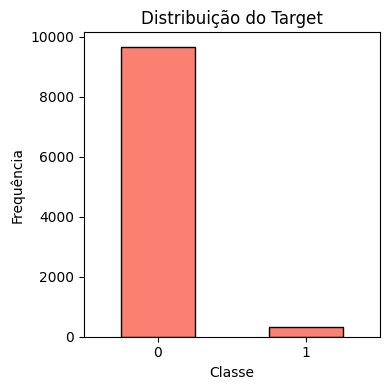

In [14]:
plt.figure(figsize=(4, 4))
df['Target'].value_counts().plot(kind='bar', color='salmon', edgecolor='black')
plt.title('Distribuição do Target')
plt.ylabel('Frequência')
plt.xlabel('Classe')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


Análise Bivariada

Correlação de Pearson: -0.8750270862996068
p-valor: 0.0


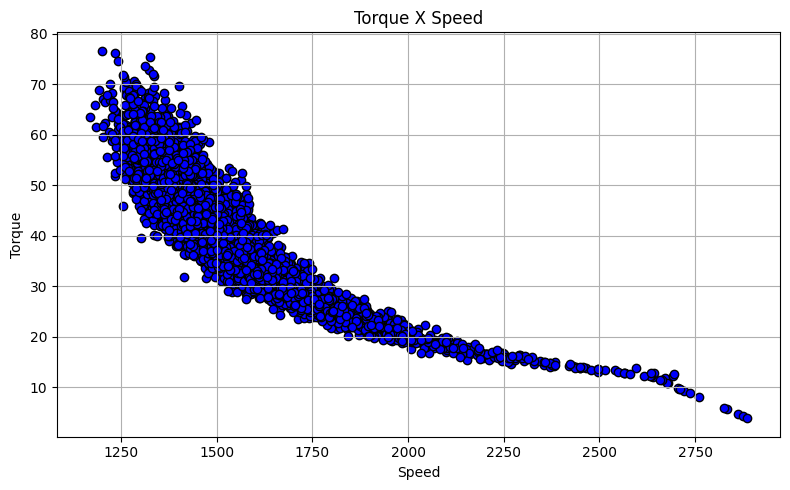

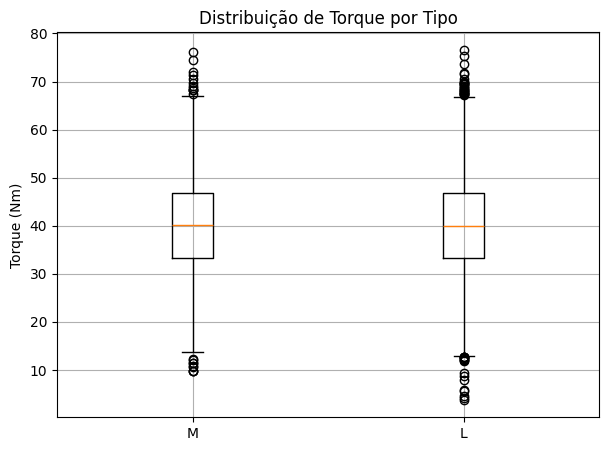

In [15]:
from scipy.stats import pearsonr
# Correlação de Pearson
corr, p_value = pearsonr(df['Torque [Nm]'], df['Rotational speed [rpm]'])

print(f'Correlação de Pearson: {corr}')
print(f'p-valor: {p_value}')

plt.figure(figsize=(8,5))
plt.scatter(df['Rotational speed [rpm]'], df['Torque [Nm]'], color='blue', edgecolor='black')
plt.title('Torque X Speed')
plt.xlabel('Speed')
plt.ylabel('Torque')
plt.grid(True)
plt.tight_layout()
plt.show()



torque_M = df[df['Type'] == 'M']['Torque [Nm]']
torque_L = df[df['Type'] == 'L']['Torque [Nm]']

# Plot do boxplot com matplotlib
plt.figure(figsize=(7, 5))
plt.boxplot([torque_M, torque_L], labels=['M', 'L'])
plt.title('Distribuição de Torque por Tipo')
plt.ylabel('Torque (Nm)')
plt.grid(True)
plt.show()

Matriz de correlação entre todas as variáveis numéricas

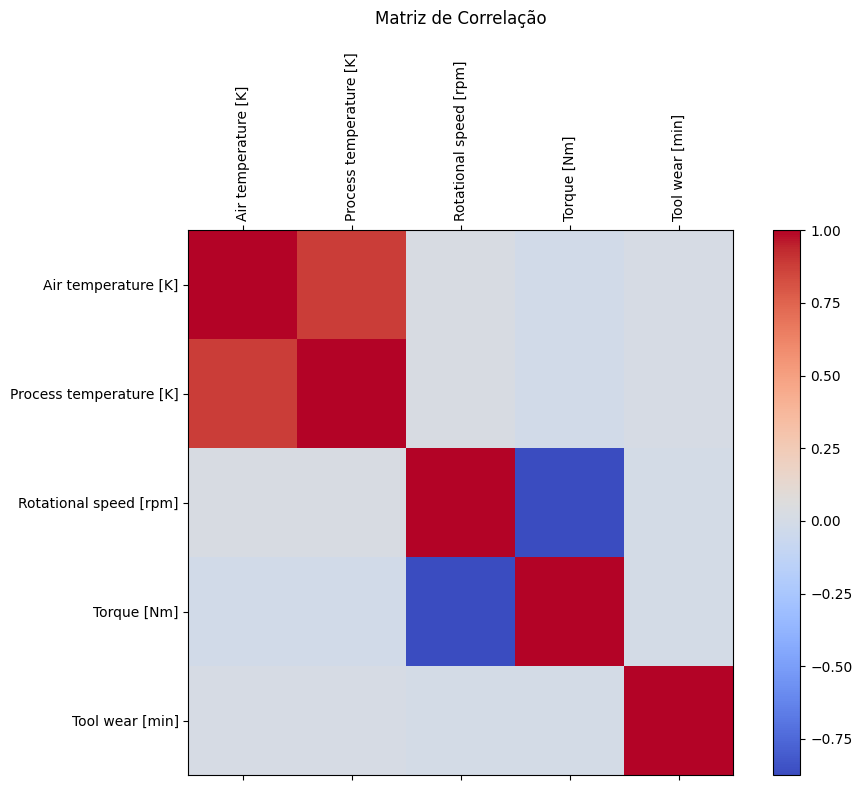

In [16]:
corr_matrix = df[numericas].corr()

fig, ax = plt.subplots(figsize=(10, 8))
cax = ax.matshow(corr_matrix, cmap='coolwarm')
fig.colorbar(cax)

# Títulos nos eixos
ax.set_xticks(range(len(numericas)))
ax.set_yticks(range(len(numericas)))
ax.set_xticklabels(numericas, rotation=90)
ax.set_yticklabels(numericas)

plt.title("Matriz de Correlação", pad=20)
plt.tight_layout()
plt.show()

Distribuição de Target por tipo de falha

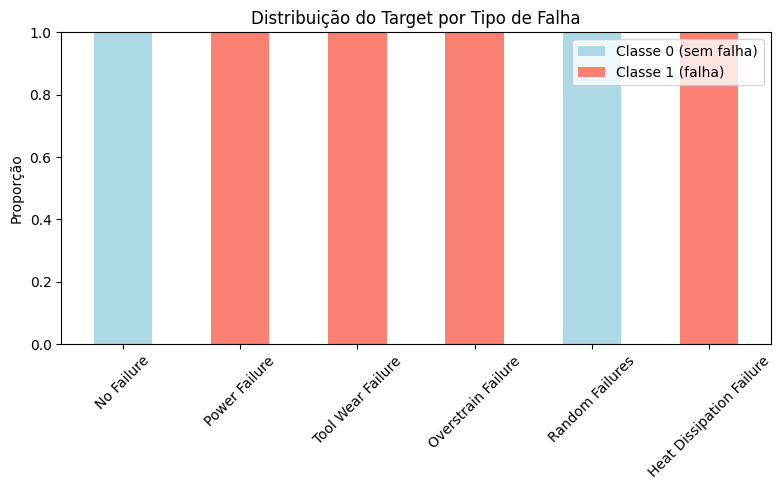

In [17]:
failure_types = df['Failure Type'].unique()
target_0 = []
target_1 = []

for ftype in failure_types:
    group = df[df['Failure Type'] == ftype]['Target'].value_counts(normalize=True)
    target_0.append(group.get(0, 0))
    target_1.append(group.get(1, 0))

bar_width = 0.5
x = np.arange(len(failure_types))

plt.figure(figsize=(8, 5))
plt.bar(x, target_0, bar_width, label='Classe 0 (sem falha)', color='lightblue')
plt.bar(x, target_1, bar_width, bottom=target_0, label='Classe 1 (falha)', color='salmon')

plt.xticks(x, failure_types, rotation=45)
plt.ylabel('Proporção')
plt.title('Distribuição do Target por Tipo de Falha')
plt.legend()
plt.tight_layout()
plt.show()
